# 1) Delivery_time -> Predict delivery time using sorting time 

In [57]:
import pandas as pd

In [58]:
delivery_time = pd.read_csv(r'C:\Users\poorn\OneDrive\Documents\ExcelR\Asssignment\Assign_4\delivery_time.csv')
delivery_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#EDA

In [59]:
delivery_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [60]:
delivery_time.shape

(21, 2)

In [61]:
delivery_time.isnull().any().any()

False

In [62]:
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [63]:
delivery_time.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [64]:
# Renaming Columns
delivery_time=delivery_time.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
delivery_time

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


Data Visualization

In [65]:
import seaborn as sns

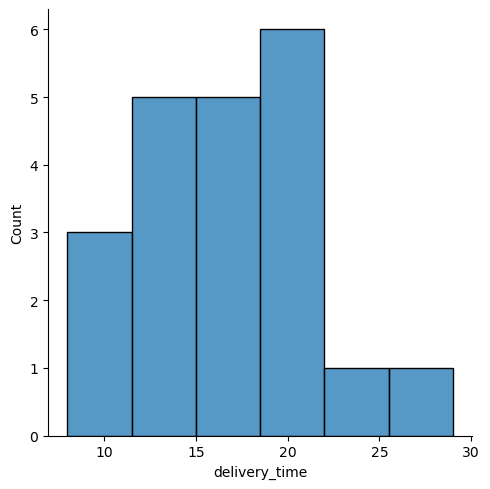

In [66]:
sns.displot(delivery_time['delivery_time'])

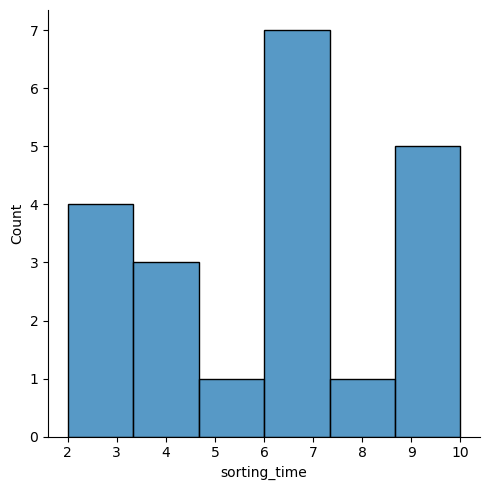

In [70]:
sns.displot(delivery_time['sorting_time'])

 Correlation Analysis

In [71]:
delivery_time.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


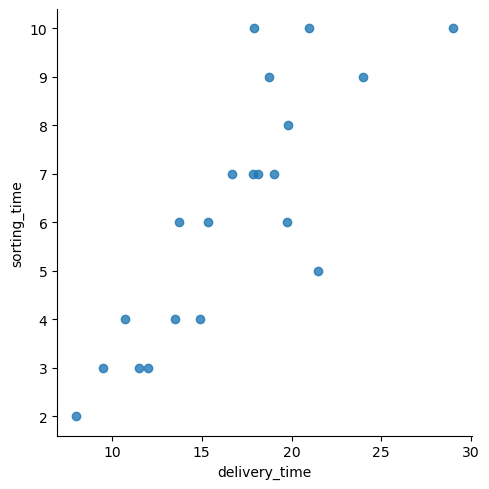

In [73]:
sns.lmplot(data = delivery_time, x = 'delivery_time', y = 'sorting_time', fit_reg = False)

#Model Building

In [75]:
import statsmodels.formula.api as smf

In [76]:
model= smf.ols("delivery_time ~ sorting_time",data = delivery_time).fit()

In [ ]:
#Model Testing

In [77]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [78]:

#finding tvalues
model.tvalues

Intercept       3.823349
sorting_time    6.387447
dtype: float64

In [79]:
#finding Pvalues
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [80]:
#Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

Prediction

In [81]:
# Let prediction  sorting time 5
delivery_time = (6.582734) + (1.649020)*(8)
delivery_time



19.774894

In [82]:
# Let new data Predict for sorting time 2, 8
new_data=pd.Series([2,8])
new_data


0    2
1    8
dtype: int64

In [83]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred




,sorting_time
0,2
1,8


In [84]:
model.predict(data_pred)

0     9.880774
1    19.774893
dtype: float64